<font size=5>  **Python 基礎應用** </font>

<font size=5>  學員：151 陳振偉 </font>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import pandas as pd
import sympy as sp
import matplotlib.patches as patches
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter
import warnings

In [2]:
x=sp.Symbol('x')

<font size=5>  **連續函數** </font>

以$A \subseteq \mathbb{R}$, $f:A \rightarrow \mathbb{R}$，若$f(x)$ 在 $a$ 點為連續，其定義如下:
1. $f(a)$ 有定義，即 $\forall a \in A$ , $f(a) \in \mathbb{R} $ (函數值存在)
2. 極限$\lim_{x \rightarrow a} f(x)$ 存在，即左極限等於右極限
3. 極限值等於函數值，即$\lim_{x \rightarrow a} f(x)=f(a)$


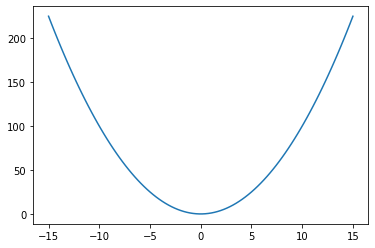

In [2]:
def f(x):
    return x**2 

x = np.linspace(-15,15,100)
plt.plot(x, f(x))
plt.show()

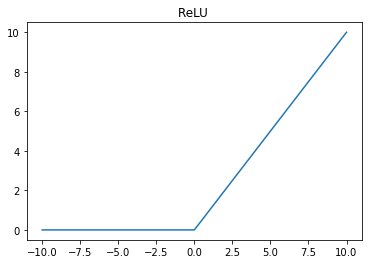

In [4]:
def relu(x):
    return max(0.0, x)
 

series_in = [x for x in range(-10, 11)]
series_out = [relu(x) for x in series_in]
plt.plot(series_in, series_out)
plt.title('ReLU ')
plt.show()

<font size=5> **不連續函數，以分段函數為例** </font>

\begin{cases}
        1 & ,x > 0\\
        0.5 & , x = 0\\
        0 & , x<0
\end{cases}

(-0.1, 1.1)

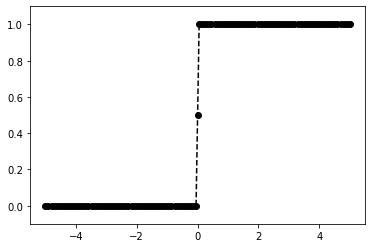

In [5]:
def g(x): 
    return 0.5 * (np.sign(x) + 1)

x=np.linspace(0,10,100)
yl=np.random.rand(50) 
yr=np.random.rand(50)+100
yobs=np.concatenate((yl,yr),axis=0)
x_v = sorted(np.concatenate([np.linspace(-5,5,100),[0]])) 
y_v = g(x_v)
plt.plot(x_v,y_v,'ko--')
plt.ylim(-0.1,1.1)

<font size=5> **導數** </font>

<font size=3> **割線** </font>

割線，以過$(x_1,y_1)$為例

割線斜率 $$m=\frac{f(x)-f(x_1)}{x - x_1}$$
割線方程式 $y-y_1 = m(x-x_1)$

<font size=3> **導數** </font>

$f(x)$在$a$點的導數定義如下：
$$f^{\prime}(a)=\lim_{x\rightarrow a}\frac{f(x)-f(a)}{x - a}=\lim_{h\rightarrow 0}\frac{f(a+h)-f(a)}{h}$$

切線斜率$f^{\prime}(a)$

切線方程式$y-f(a) = f^{\prime}(a)(x-a)$

In [6]:
x = np.linspace(-15,15,100)

def h(x1):
  y1 = f(x1)
  x2 = 1
  xrange = np.linspace(x2-2, x1+8, 10)
  def line_m(x2, x1):
        return ((f(x1)-f(x2))/(x1-x2))*(xrange - x2) + f(x2)

  plt.figure()
  plt.plot(x, f(x))
  plt.scatter(x1, y1, color='C1', s=50)
  plt.scatter(x2, f(x2), color='C1', s=50)
  plt.plot(xrange, line_m(x2, x1), 'C1--', linewidth = 2)

interact_plot = interact(h ,x1 = (1.0001,15.),step =100)
interact_plot

interactive(children=(FloatSlider(value=8.00005, description='x1', max=15.0, min=1.0001), Output()), _dom_clas…

<function __main__.h(x1)>

In [3]:
def slope(x): 
    return 2*x

x = np.linspace(-10,10,100)

def h(x3):
  y3 = f(x3)
  def line(x, x3, y3):
      return slope(x3)*(x - x3) + y3

  # Define x data range for tangent line
  xrange = np.linspace(x3-5, x3+5, 10)

  # Plot the figure
  plt.figure(1)
  plt.plot(1,2,1)
  plt.plot(x, f(x))
  plt.scatter(x3, y3, color='C1', s=50)
  plt.plot(xrange, line(xrange, x3, y3), 'C1--', linewidth = 2)

interact_plot = interact(h ,x3 = (-10,10),step =100)
interact_plot

interactive(children=(IntSlider(value=0, description='x3', max=10, min=-10), Output()), _dom_classes=('widget-…

<function __main__.h(x3)>

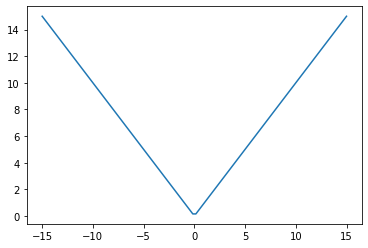

In [8]:
x = np.linspace(-15,15,100)
plt.plot(x, np.abs(x))
plt.show()

可微分$\Rightarrow$ 連續函數 $\Rightarrow$ 極限存在

以$|x|$為例，連續但不可微，$\lim\limits_{x \to {{\rm{0}}^ + }} \left| x \right| = \lim\limits_{x \to {{\rm{0}}^ - }} \left| x \right| =|0|= 0$

但$\lim\limits_{x \to {{\rm{0}}^ + }} \frac{|x|-0}{x-0} =1$ $\neq$ $\lim\limits_{x \to {{\rm{0}}^ - }} \frac{|x|-0}{x-0} =-1$

<font size=3> **積分** </font>

$$\int_a^b f(x)dx = \lim_{x \rightarrow \infty} \sum_{i=1}^n f(\alpha_i) \Delta x_i,\ 其中 \alpha_i \in [x_{i-1}, x_i],\ \Delta x_i=x_i - x_{i-1}$$

In [4]:
def N(Ni):
    a = -5; b = 5;
    n = 10 

    x = np.linspace(a,b,Ni+1)
    y = f(x)

    X = np.linspace(a,b,n*Ni+1)
    Y = f(X)

    plt.figure(figsize=(15,5))

    plt.plot(1,2,2)
    plt.plot(X,Y,'b')
    x_left = x[:-1] 
    y_left = y[:-1]
    plt.plot(x_left,y_left,'b.',markersize=10)
    plt.bar(x_left,y_left,width=(b-a)/Ni,alpha=0.2,align='edge',edgecolor='b')
    plt.title('Left Riemann Sum, N = {}'.format(Ni))

    plt.plot(1,2,2)
    plt.plot(X,Y,'r')
    x_right = x[1:] 
    y_right = y[1:]
    plt.plot(x_right,y_right,'r.',markersize=10)
    plt.bar(x_right,y_right,width=-(b-a)/Ni,alpha=0.2,align='edge',edgecolor='r')
    plt.title('Right Riemann Sum, N = {}'.format(Ni))

    plt.show()
int_plot = interact(N ,Ni = (3,80),step =100)
int_plot

interactive(children=(IntSlider(value=41, description='Ni', max=80, min=3), Output()), _dom_classes=('widget-i…

<function __main__.N(Ni)>

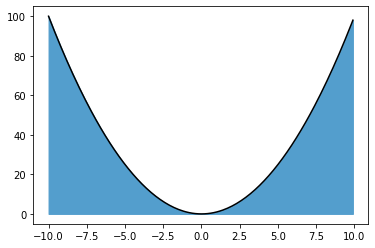

In [10]:
x = np.arange(-10,10,0.1)

plt.plot(x,f(x),'k-')
plt.fill_between(x, f(x), color='#539ecd')
plt.show()

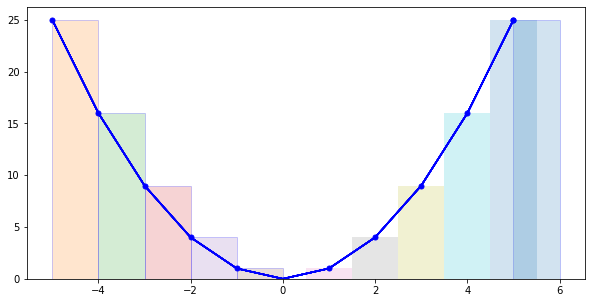

In [33]:
def g(x):
    return x**2 
a1=-5
b1=5
n = 10 
N=10

x = np.linspace(a1,b1,N+1)
y = g(x)

plt.figure(figsize=(10,5))

for i in range(0,N+1):
    if g(x[i-1]) < g(x[i]):
        xm = x[i]
        ym = g(xm)
        plt.plot(x,y,'b') 
        plt.plot(xm,ym,'b.',markersize=10)
        plt.bar(xm,ym,width=,alpha=0.2)
    elif g(x[i-1]) >= g(x[i]):
        xm = x[i-1]
        ym = g(xm)
        plt.plot(x,y,'b') 
        plt.plot(xm,ym,'b.',markersize=10)
        plt.bar(xm,ym,width=(b1-a1)/N,alpha=0.2,align='edge',edgecolor='b') 
    else:
        print('哭')
    
plt.show()